In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the diabetes dataset
diabetes = pd.read_csv('diabetes.csv')

In [7]:
#Preprocessing
#Check for null values in the dataset
null_values = diabetes.isnull().sum()

#Display null values
print("Null values in the dataset:")
print(null_values)

Null values in the dataset:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
#Set seed
np.random.seed(45)

In [9]:
sample_data = diabetes.sample(25)

In [10]:
#Mean and highest Glucose values with population statistics
diabetes_mean = diabetes['Glucose'].mean()
diabetes_max = diabetes['Glucose'].max()

sample_mean = sample_data['Glucose'].mean()
sample_max = sample_data['Glucose'].max()
print("Population Mean: ", diabetes_mean)
print("Sample Mean: ", sample_mean)
print("Population Max: ", diabetes_max)
print("Sample Max: ", sample_max)

Population Mean:  120.89453125
Sample Mean:  119.24
Population Max:  199
Sample Max:  193


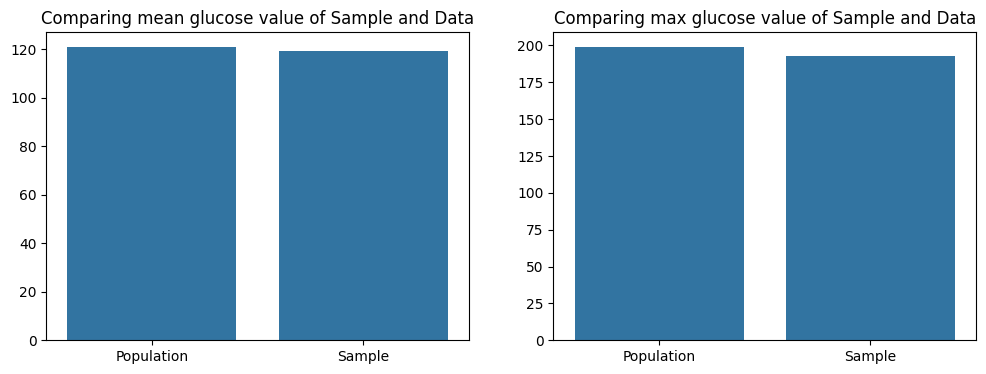

In [11]:
# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(x=['Population', 'Sample'], y=[diabetes_mean, sample_mean], ax=axes[0])
axes[0].set_title('Comparing mean glucose value of Sample and Data')

sns.barplot(x=['Population', 'Sample'], y=[diabetes_max, sample_max], ax=axes[1])
axes[1].set_title('Comparing max glucose value of Sample and Data')

plt.show()

In [12]:
#Find the 98th percentile of BMI
data_bmi = np.percentile(diabetes['BMI'], 98)
sample_bmi = np.percentile(sample_data['BMI'], 98)

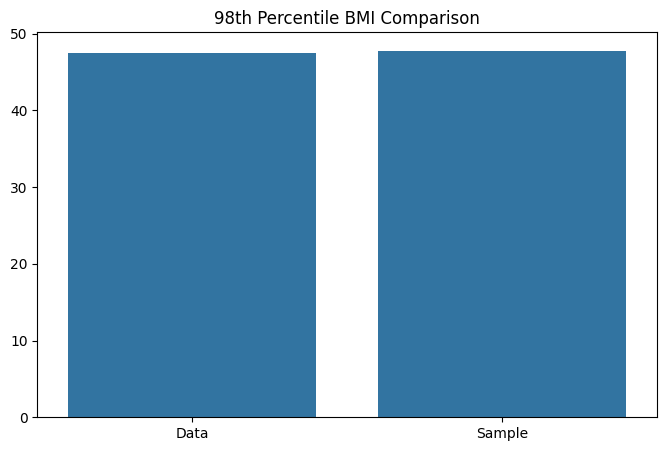

In [13]:
#Plot for comparing BMI of given data and BMI of the sample
plt.figure(figsize=(8, 5))
sns.barplot(x=['Data', 'Sample'], y=[data_bmi, sample_bmi])
plt.title('98th Percentile BMI Comparison')
plt.show()

In [14]:
#Bootstrap sampling with num of samples 500 and sample size of 150

means = []
stds = []
percentiles = []

for _ in range(500):
    bootstrap_sample = diabetes['BloodPressure'].sample(150, replace=True)
    means.append(bootstrap_sample.mean())
    stds.append(bootstrap_sample.std())
    percentiles.append(np.percentile(bootstrap_sample, 95))



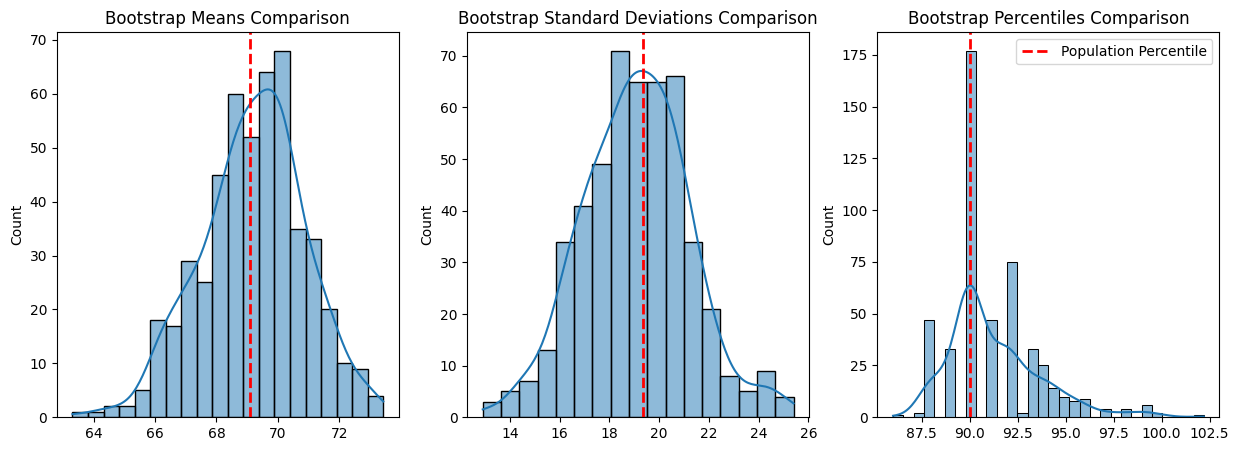

In [15]:
#Compare with population statistics
data_mean = diabetes['BloodPressure'].mean()
data_std = diabetes['BloodPressure'].std()
data_percentile = np.percentile(diabetes['BloodPressure'], 95)

#Plot for comparing data mean for BP and that of sample
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(means, ax=axes[0], kde=True)
axes[0].axvline(data_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
axes[0].set_title('Bootstrap Means Comparison')

sns.histplot(stds, ax=axes[1], kde=True)
axes[1].axvline(data_std, color='red', linestyle='dashed', linewidth=2, label='Population Std')
axes[1].set_title('Bootstrap Standard Deviations Comparison')

sns.histplot(percentiles, ax=axes[2], kde=True)
axes[2].axvline(data_percentile, color='red', linestyle='dashed', linewidth=2, label='Population Percentile')
axes[2].set_title('Bootstrap Percentiles Comparison')

plt.legend()
plt.show()

#means